In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('spreadspoke_scores.csv')

In [3]:
# creating a smaller dataset with the columns we desire
df = pd.read_csv('spreadspoke_scores.csv', usecols = ['schedule_season', 'schedule_week', 'score_home', 'score_away', 'team_home', 'team_away'])

In [4]:
# seeing the amount of NA's in the data
df.isna().sum()

schedule_season    87
schedule_week      87
team_home          87
score_home         87
score_away         87
team_away          87
dtype: int64

In [5]:
# excluding the columns with an NA
df = df[ df['schedule_season'].notna() & df['schedule_week'].notna() & df['team_home'].notna() & df['score_home'].notna() & df['score_away'].notna() & df['team_away'].notna()]

In [6]:
df.shape

(13203, 6)

In [7]:
df['schedule_season']

0        1966.0
1        1966.0
2        1966.0
3        1966.0
4        1966.0
          ...  
13198    2021.0
13199    2021.0
13200    2021.0
13201    2021.0
13202    2021.0
Name: schedule_season, Length: 13203, dtype: float64

In [8]:
# checking how many unique schedule_season variables there are
np.unique(df['schedule_season'])

array([1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021.])

In [9]:
# creating game total scores column
dflist = ['score_home', 'score_away']
df['game_total_score'] = df[dflist].sum(axis=1)

In [10]:
df

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,game_total_score
0,1966.0,1,Miami Dolphins,14.0,23.0,Oakland Raiders,37.0
1,1966.0,1,Houston Oilers,45.0,7.0,Denver Broncos,52.0
2,1966.0,1,San Diego Chargers,27.0,7.0,Buffalo Bills,34.0
3,1966.0,2,Miami Dolphins,14.0,19.0,New York Jets,33.0
4,1966.0,1,Green Bay Packers,24.0,3.0,Baltimore Colts,27.0
...,...,...,...,...,...,...,...
13198,2021.0,17,San Francisco 49ers,23.0,7.0,Houston Texans,30.0
13199,2021.0,17,Seattle Seahawks,51.0,29.0,Detroit Lions,80.0
13200,2021.0,17,Tennessee Titans,34.0,3.0,Miami Dolphins,37.0
13201,2021.0,17,Washington Football Team,16.0,20.0,Philadelphia Eagles,36.0


In [11]:
# turning columns into integers so they can be graphed
df['schedule_season'] = df['schedule_season'].astype('int')
df['score_home'] = df['score_home'].astype('int')
df['score_away'] = df['score_away'].astype('int')
df['game_total_score'] = df['game_total_score'].astype('int')

In [12]:
df.isna().sum()

schedule_season     0
schedule_week       0
team_home           0
score_home          0
score_away          0
team_away           0
game_total_score    0
dtype: int64

In [13]:
# Getting rid of the NA's in the data we pulled
df = df[df['schedule_season'].notna() & df['score_home'].notna() & df['score_away'].notna()]

In [14]:
df

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,game_total_score
0,1966,1,Miami Dolphins,14,23,Oakland Raiders,37
1,1966,1,Houston Oilers,45,7,Denver Broncos,52
2,1966,1,San Diego Chargers,27,7,Buffalo Bills,34
3,1966,2,Miami Dolphins,14,19,New York Jets,33
4,1966,1,Green Bay Packers,24,3,Baltimore Colts,27
...,...,...,...,...,...,...,...
13198,2021,17,San Francisco 49ers,23,7,Houston Texans,30
13199,2021,17,Seattle Seahawks,51,29,Detroit Lions,80
13200,2021,17,Tennessee Titans,34,3,Miami Dolphins,37
13201,2021,17,Washington Football Team,16,20,Philadelphia Eagles,36


In [15]:
df_2 = df[['schedule_season','game_total_score']].copy()
df_2 = pd.DataFrame(df_2)
df_2

,schedule_season,game_total_score
0,1966,37
1,1966,52
2,1966,34
3,1966,33
4,1966,27
...,...,...
13198,2021,30
13199,2021,80
13200,2021,37
13201,2021,36


In [16]:
total_score_df = df_2.groupby(df_2['schedule_season'])['game_total_score'].sum().reset_index(name='total_score')
total_score_df

,schedule_season,total_score
0,1966,7543
1,1967,7984
2,1968,7937
3,1969,7908
4,1970,7198
5,1971,7263
6,1972,7591
7,1973,7373
8,1974,6874
9,1975,7789


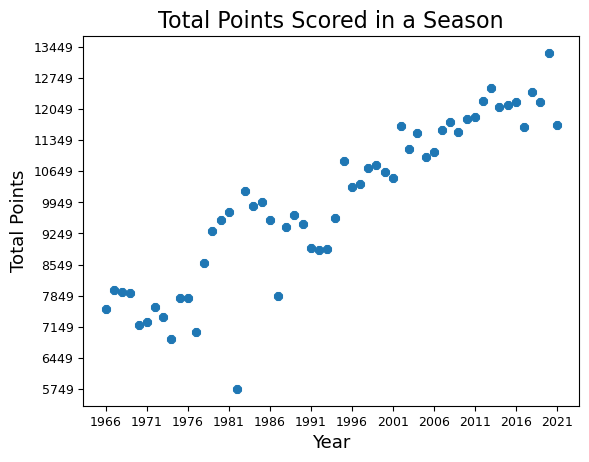

In [17]:
# Creating a Scatter Plot
plt.figure()

plt.scatter(total_score_df['schedule_season'], total_score_df['total_score'], marker='8', )
# adding titles
plt.title('Total Points Scored in a Season', fontsize=16)
plt.ylabel('Total Points', fontsize=13)
plt.xlabel('Year', fontsize=13)
# 
my_x_ticks = [*range(total_score_df['schedule_season'].min(), 
                     total_score_df['schedule_season'].max()+5, 5)]
plt.xticks(my_x_ticks, fontsize=9, color='black')

my_y_ticks = [*range(total_score_df['total_score'].min(), 
                     total_score_df['total_score'].max()+700, 700)]
plt.yticks(my_y_ticks, fontsize=9, color='black')


plt.show()

In [18]:
# selecting the columns we only want to look at from the original data
weather_df = pd.read_csv('spreadspoke_scores.csv', usecols = ['weather_temperature', 'weather_wind_mph', 'weather_humidity'])

In [19]:
weather_df

,weather_temperature,weather_wind_mph,weather_humidity
0,83.0,6.0,71.0
1,81.0,7.0,70.0
2,70.0,7.0,82.0
3,82.0,11.0,78.0
4,64.0,8.0,62.0
...,...,...,...
13285,NaN,NaN,NaN
13286,NaN,NaN,NaN
13287,NaN,NaN,NaN
13288,NaN,NaN,NaN


In [20]:
# looking at the NA's in the data set
weather_df.isna().sum()

weather_temperature    1130
weather_wind_mph       1147
weather_humidity       4867
dtype: int64

In [21]:
weather_df.weather_temperature.value_counts()

 72.0    2729
 60.0     286
 56.0     278
 61.0     254
 62.0     253
         ... 
 7.0        1
 4.0        1
 93.0       1
-6.0        1
 97.0       1
Name: weather_temperature, Length: 100, dtype: int64

In [22]:
# looking for NA's in this columns and fills the NA
weather_df.weather_temperature.fillna("Not Available", inplace=True)
weather_df.weather_wind_mph.fillna("Not Available", inplace=True)
weather_df.weather_humidity.fillna("Not Available", inplace=True)

In [23]:
weather_df.value_counts()

weather_temperature  weather_wind_mph  weather_humidity
72.0                 0.0               Not Available       2563
Not Available        Not Available     Not Available       1130
77.0                 7.0               Not Available          7
72.0                 7.0               Not Available          7
68.0                 7.0               Not Available          6
                                                           ... 
33.0                 7.0               67.0                   1
52.0                 12.0              63.0                   1
33.0                 7.0               73.0                   1
52.0                 12.0              51.0                   1
-6.0                 12.0              Not Available          1
Length: 8208, dtype: int64

In [24]:
y = weather_df.groupby(['weather_wind_mph']).agg({'weather_wind_mph': ['count']}).reset_index()
y

weather_wind_mph      
                    count
0               0.0  2649
1               1.0   167
2               2.0   134
3               3.0   180
4               4.0   311
5               5.0   487
6               6.0   792
7               7.0   817
8               8.0  1057
9               9.0   889
10             10.0   881
11             11.0   737
12             12.0   754
13             13.0   463
14             14.0   472
15             15.0   330
16             16.0   279
17             17.0   212
18             18.0   133
19             19.0   112
20             20.0    84
21             21.0    53
22             22.0    52
23             23.0    28
24             24.0    23
25             25.0    13
26             26.0    13
27             27.0     9
28             28.0     3
29             30.0     5
30             31.0     2
31             32.0     1
32             40.0     1
33    Not Available  1147

In [25]:
y.columns = ['weather_wind_mph', 'count']
y

,weather_wind_mph,count
0,0.0,2649
1,1.0,167
2,2.0,134
3,3.0,180
4,4.0,311
5,5.0,487
6,6.0,792
7,7.0,817
8,8.0,1057
9,9.0,889


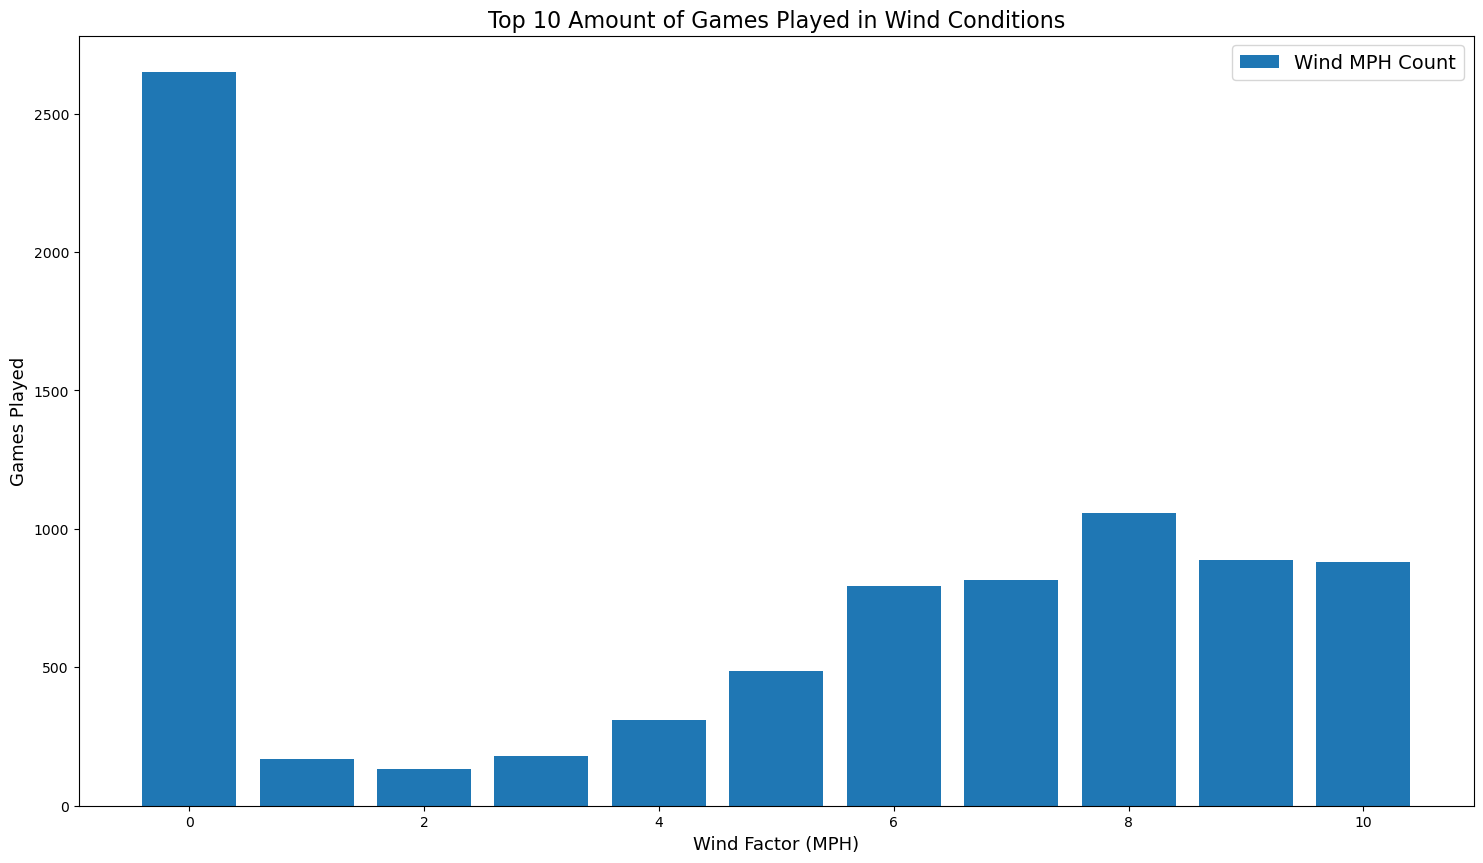

In [26]:
# Creating a Bar Chart
plt.figure(figsize=(18,10))

plt.bar(y.loc[0:10, 'weather_wind_mph'], y.loc[0:10, 'count'], label='Wind MPH Count')
plt.legend(loc='upper right', fontsize=14)
plt.title('Top 10 Amount of Games Played in Wind Conditions', fontsize=16)
plt.ylabel('Games Played', fontsize=13)
plt.xlabel('Wind Factor (MPH)', fontsize=13)

plt.show()